<a href="https://colab.research.google.com/github/Ramayanapu-Mangadevi/Employee-Attrition-Analysis/blob/main/Employee_Attrition_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all necessary libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
from scipy import stats as st

Importing Data File

In [ ]:
df=pd.read_csv("Cleaned_Employee_Data.csv")

**Understanding Employee Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   employee_id                    10000 non-null  int64 
 1   age                            10000 non-null  int64 
 2   gender                         10000 non-null  object
 3   marital_status                 10000 non-null  object
 4   department                     10000 non-null  object
 5   job_role                       10000 non-null  object
 6   job_level                      10000 non-null  int64 
 7   monthly_income                 10000 non-null  int64 
 8   hourly_rate                    10000 non-null  int64 
 9   years_at_company               10000 non-null  int64 
 10  years_in_current_role          10000 non-null  int64 
 11  years_since_last_promotion     10000 non-null  int64 
 12  work_life_balance              10000 non-null  int64 
 13  jo

Performing Quick check for duplicates

In [ ]:
df[df.duplicated()]

,employee_id,age,gender,marital_status,department,job_role,job_level,monthly_income,hourly_rate,years_at_company,...,overtime,project_count,average_hours_worked_per_week,absenteeism,work_environment_satisfaction,relationship_with_manager,job_involvement,distance_from_home,number_of_companies_worked,attrition


Checking for Null Values

In [ ]:
df.isnull().sum()

,0
employee_id,0
age,0
gender,0
marital_status,0
department,0
job_role,0
job_level,0
monthly_income,0
hourly_rate,0
years_at_company,0


Summary statistics

In [ ]:
df.describe()

,employee_id,age,job_level,monthly_income,hourly_rate,years_at_company,years_in_current_role,years_since_last_promotion,work_life_balance,job_satisfaction,performance_rating,training_hours_last_year,project_count,average_hours_worked_per_week,absenteeism,work_environment_satisfaction,relationship_with_manager,job_involvement,distance_from_home,number_of_companies_worked
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,39.561800,2.990800,11436.716700,57.032300,14.936200,7.451300,4.471900,2.502400,3.038000,2.507700,49.588900,4.984400,44.473500,9.410200,2.493100,2.491400,2.505400,25.272000,2.516600
std,2886.89568,11.454986,1.410643,4926.528302,24.703261,8.431657,4.042903,2.891617,1.112348,1.414764,1.120833,28.801393,2.580043,8.611662,5.760335,1.120927,1.115101,1.116018,14.219474,1.113934
min,1.00000,20.000000,1.000000,3000.000000,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,30.000000,2.000000,7182.500000,36.000000,8.000000,4.000000,2.000000,2.000000,2.000000,2.000000,25.000000,3.000000,37.000000,4.000000,1.000000,1.000000,2.000000,13.000000,2.000000
50%,5000.50000,40.000000,3.000000,11401.500000,57.000000,15.000000,7.000000,4.000000,2.000000,3.000000,3.000000,49.000000,5.000000,45.000000,9.000000,2.000000,2.000000,3.000000,25.000000,2.000000
75%,7500.25000,49.000000,4.000000,15679.500000,78.000000,22.000000,11.000000,7.000000,3.000000,4.000000,4.000000,75.000000,7.000000,52.000000,14.000000,4.000000,3.000000,3.000000,37.000000,4.000000
max,10000.00000,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,9.000000,4.000000,5.000000,4.000000,99.000000,9.000000,59.000000,19.000000,4.000000,4.000000,4.000000,49.000000,4.000000


Preview of First Few Rows

In [ ]:
df.head()

,employee_id,age,gender,marital_status,department,job_role,job_level,monthly_income,hourly_rate,years_at_company,...,overtime,project_count,average_hours_worked_per_week,absenteeism,work_environment_satisfaction,relationship_with_manager,job_involvement,distance_from_home,number_of_companies_worked,attrition
0,4151,55,Male,Single,It,Analyst,3,17129,63,11,...,No,6,48,5,4,2,3,8,3,No
1,7081,23,Male,Single,Hr,Manager,1,14799,87,12,...,No,1,31,6,4,3,3,11,3,No
2,7623,58,Male,Single,Marketing,Executive,4,4903,87,13,...,Yes,4,54,6,1,1,3,40,4,No
3,7950,40,Male,Married,It,Analyst,4,15132,60,28,...,No,8,40,2,1,2,3,14,2,Yes
4,9525,32,Male,Single,Marketing,Executive,5,11258,57,27,...,No,8,37,3,3,3,3,35,1,No


Preview of Last few Rows

In [ ]:
df.tail()

,employee_id,age,gender,marital_status,department,job_role,job_level,monthly_income,hourly_rate,years_at_company,...,overtime,project_count,average_hours_worked_per_week,absenteeism,work_environment_satisfaction,relationship_with_manager,job_involvement,distance_from_home,number_of_companies_worked,attrition
9995,8495,51,Male,Married,Hr,Analyst,4,9866,51,27,...,No,3,54,17,1,2,3,18,2,No
9996,8564,48,Male,Married,It,Manager,5,15572,38,27,...,Yes,4,59,10,2,2,2,4,3,No
9997,9949,49,Male,Married,Hr,Manager,5,11535,64,2,...,Yes,3,34,15,3,4,2,35,2,No
9998,9999,42,Female,Single,Marketing,Manager,3,9287,26,18,...,Yes,9,51,16,3,2,2,18,3,No
9999,10000,39,Female,Divorced,Finance,Executive,2,7225,54,16,...,Yes,4,51,6,4,1,1,6,2,Yes


Triming the spaces in column headers

In [ ]:
df.columns = df.columns.str.strip()

Convert Categorical Columns to Numeric to processing faster

In [ ]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['marital_status'] = df['marital_status'].map({'Single': 0, 'Married': 1, 'Divorced': 2})
df['overtime'] = df['overtime'].map({'Yes': 1, 'No': 0})
df['attrition'] = df['attrition'].map({'Yes': 1, 'No': 0})

Attrition Rate


In [ ]:
attrition_rate = df['attrition'].mean() * 100
print(f"Overall Attrition Rate: {attrition_rate:.2f}%")

Overall Attrition Rate: 19.97%


**Analysis On Employees with Attrition as Yes**

Creating different DataFrame to store Employees with Attrition as Yes

In [ ]:
attrition_yes = df[df['attrition'] == 1]

Summary Stastics of Attrition as yes

In [ ]:
attrition_yes.describe(include='all')

,employee_id,age,gender,marital_status,department,job_role,job_level,monthly_income,hourly_rate,years_at_company,...,overtime,project_count,average_hours_worked_per_week,absenteeism,work_environment_satisfaction,relationship_with_manager,job_involvement,distance_from_home,number_of_companies_worked,attrition
count,1997.000000,1997.000000,1997.000000,1997.000000,1997,1997,1997.000000,1997.000000,1997.000000,1997.000000,...,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.0
unique,NaN,NaN,NaN,NaN,5,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Finance,Assistant,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,415,544,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4949.843766,39.740611,0.503255,1.010015,NaN,NaN,3.023035,11438.043565,56.760641,14.981472,...,0.492238,5.019529,44.431147,9.416124,2.468202,2.482223,2.538808,25.595393,2.498247,1.0
std,2901.715003,11.642462,0.500115,0.821736,NaN,NaN,1.403713,4924.922210,25.131414,8.383001,...,0.500065,2.572227,8.704909,5.854070,1.113146,1.115706,1.109316,14.120635,1.105924,0.0
min,3.000000,20.000000,0.000000,0.000000,NaN,NaN,1.000000,3007.000000,15.000000,1.000000,...,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
25%,2384.000000,30.000000,0.000000,0.000000,NaN,NaN,2.000000,7256.000000,34.000000,8.000000,...,0.000000,3.000000,37.000000,4.000000,1.000000,1.000000,2.000000,13.000000,2.000000,1.0
50%,5009.000000,40.000000,1.000000,1.000000,NaN,NaN,3.000000,11323.000000,57.000000,15.000000,...,0.000000,5.000000,45.000000,10.000000,2.000000,2.000000,3.000000,26.000000,2.000000,1.0
75%,7425.000000,50.000000,1.000000,2.000000,NaN,NaN,4.000000,15692.000000,79.000000,22.000000,...,1.000000,7.000000,52.000000,15.000000,3.000000,3.000000,4.000000,38.000000,3.000000,1.0


Age Distribution

<Axes: xlabel='age', ylabel='Count'>

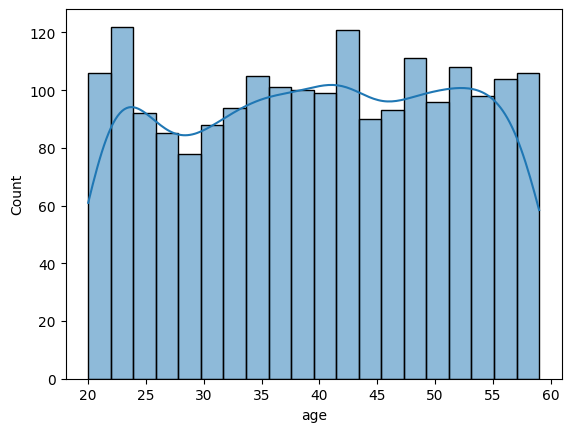

In [ ]:
sns.histplot(attrition_yes['age'], bins=20, kde=True)

Department-Wise Attrition

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Finance'),
  Text(1, 0, 'Marketing'),
  Text(2, 0, 'Sales'),
  Text(3, 0, 'It'),
  Text(4, 0, 'Hr')])

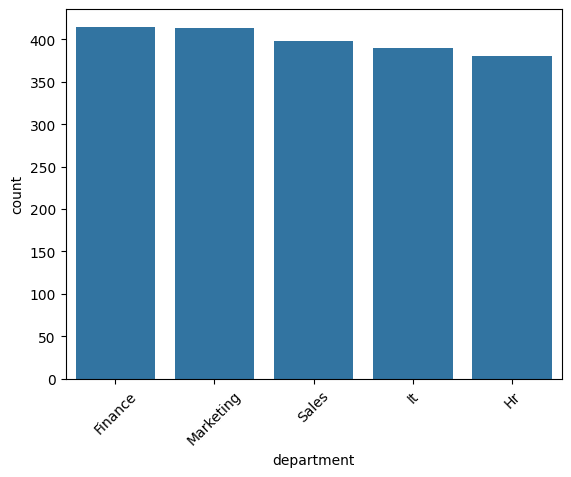

In [ ]:
sns.countplot(data=attrition_yes, x='department', order=attrition_yes['department'].value_counts().index)
plt.xticks(rotation=45)

Job Role Wise Distribution

<Axes: xlabel='job_role', ylabel='count'>

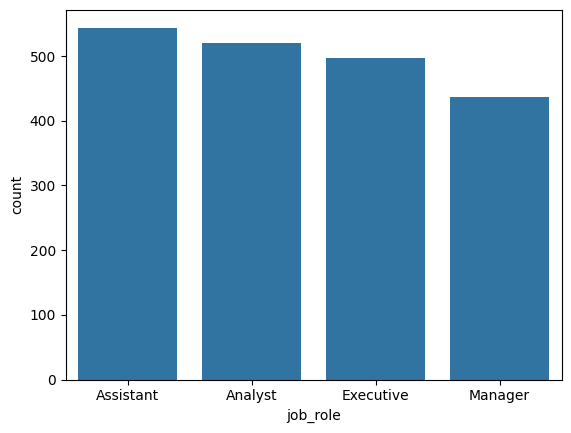

In [ ]:
sns.countplot(data=attrition_yes, x='job_role', order=attrition_yes['job_role'].value_counts().index)

Job Level Wise Distribution

<Axes: xlabel='job_level', ylabel='count'>

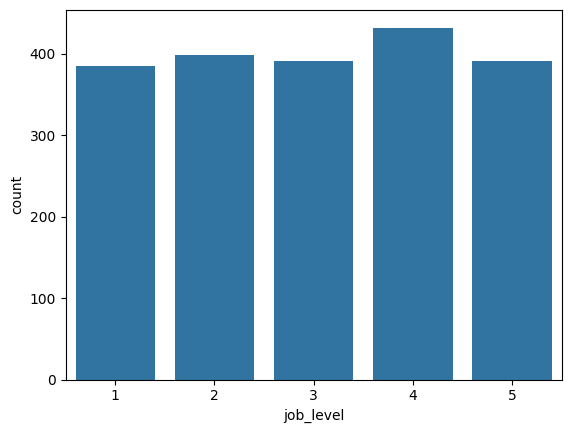

In [ ]:
sns.countplot(data=attrition_yes, x='job_level')


Work-Life Balance Distribution

<Axes: xlabel='work_life_balance'>

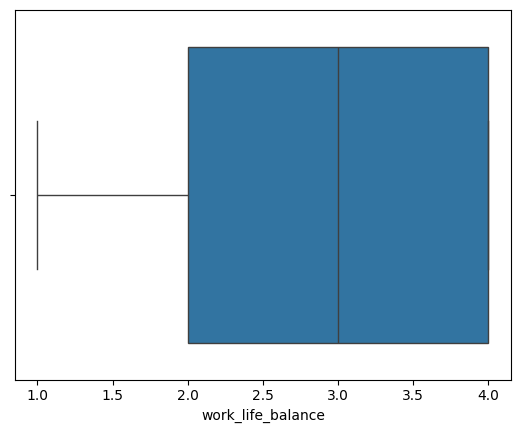

In [ ]:
sns.boxplot(data=attrition_yes, x='work_life_balance')

Job Satisfaction Distribution

<Axes: xlabel='job_satisfaction'>

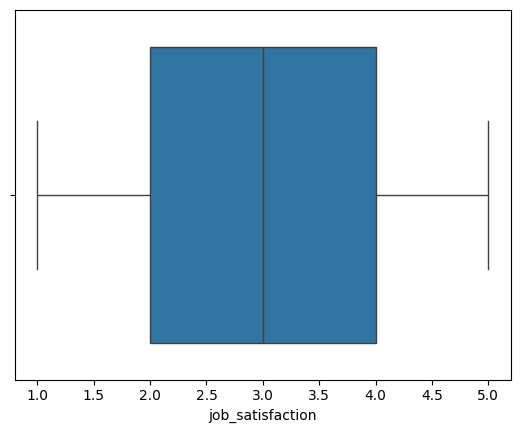

In [ ]:
sns.boxplot(data=attrition_yes, x='job_satisfaction')

Overtime vs. Attrition

<Axes: xlabel='overtime', ylabel='count'>

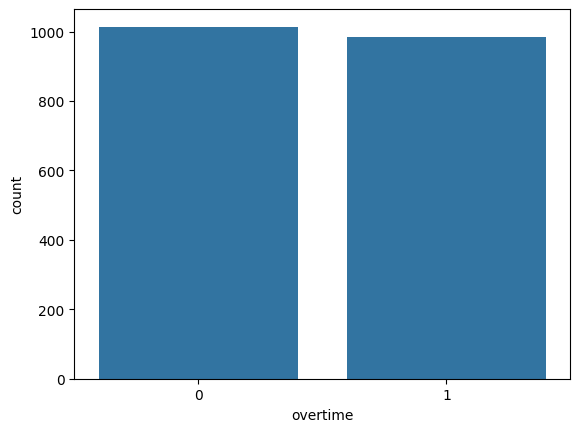

In [ ]:
sns.countplot(data=attrition_yes, x='overtime')

BiVariant Analysis

Job Satisfaction vs Work-Life Balance

<ipython-input-21-e942c561ca93>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=attrition_yes["job_satisfaction"], y=attrition_yes["work_life_balance"], palette="coolwarm")


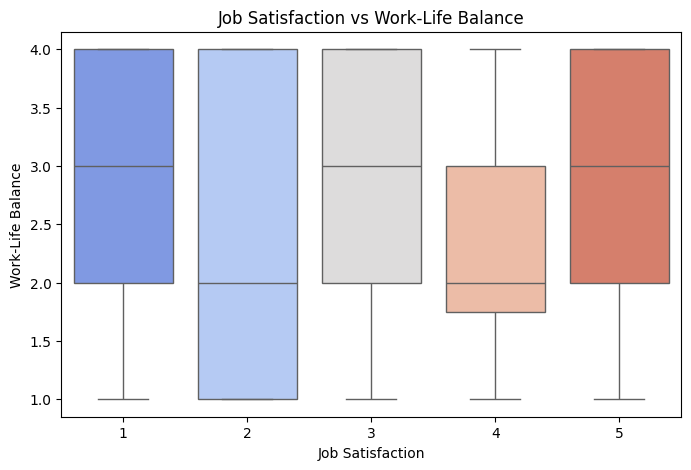

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=attrition_yes["job_satisfaction"], y=attrition_yes["work_life_balance"], palette="coolwarm")
plt.xlabel("Job Satisfaction")
plt.ylabel("Work-Life Balance")
plt.title("Job Satisfaction vs Work-Life Balance")
plt.show()

Work Environment Satisfaction vs Relationship with Manager

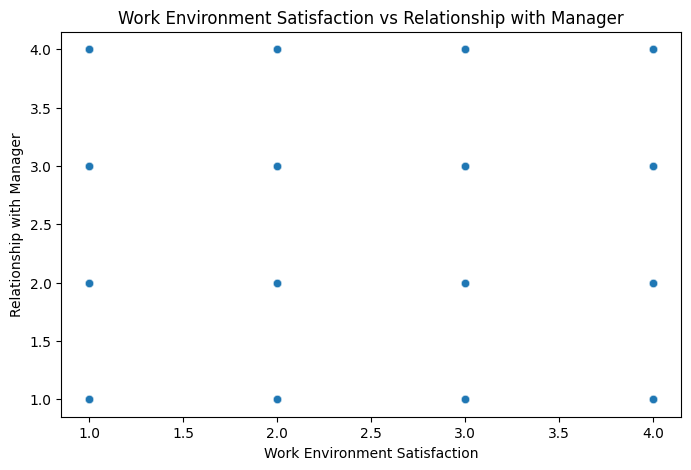

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=attrition_yes["work_environment_satisfaction"], y=attrition_yes["relationship_with_manager"], alpha=0.6)
plt.xlabel("Work Environment Satisfaction")
plt.ylabel("Relationship with Manager")
plt.title("Work Environment Satisfaction vs Relationship with Manager")
plt.show()

Job Level Vs Monthly Salary

<Axes: xlabel='job_level', ylabel='monthly_income'>

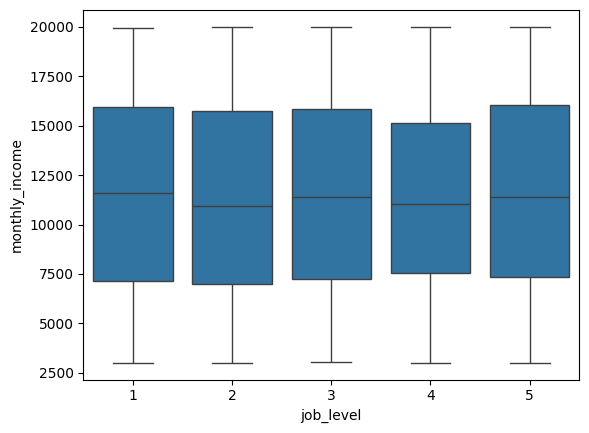

In [ ]:
sns.boxplot(data=attrition_yes, x='job_level', y='monthly_income')

Years at Company vs Years Since Last Promotion

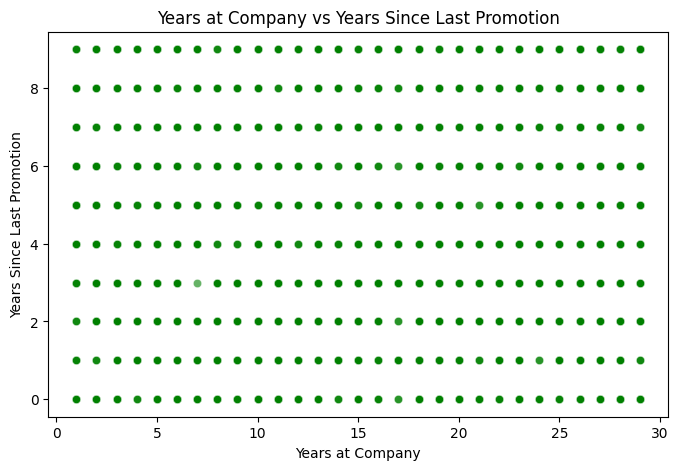

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=attrition_yes["years_at_company"], y=attrition_yes["years_since_last_promotion"], alpha=0.6, color="green")
plt.xlabel("Years at Company")
plt.ylabel("Years Since Last Promotion")
plt.title("Years at Company vs Years Since Last Promotion")
plt.show()

Performance Rating vs Project Count

<ipython-input-25-2c7383aea593>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=attrition_yes["performance_rating"], y=attrition_yes["project_count"], palette="muted")


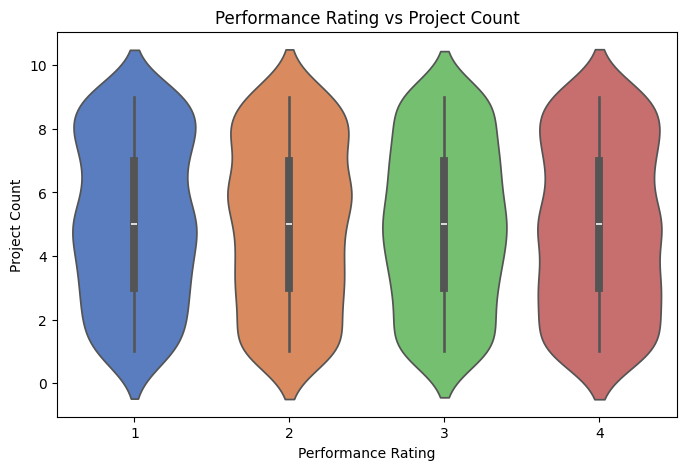

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(x=attrition_yes["performance_rating"], y=attrition_yes["project_count"], palette="muted")
plt.xlabel("Performance Rating")
plt.ylabel("Project Count")
plt.title("Performance Rating vs Project Count")
plt.show()

Correlation Analysis

<Axes: >

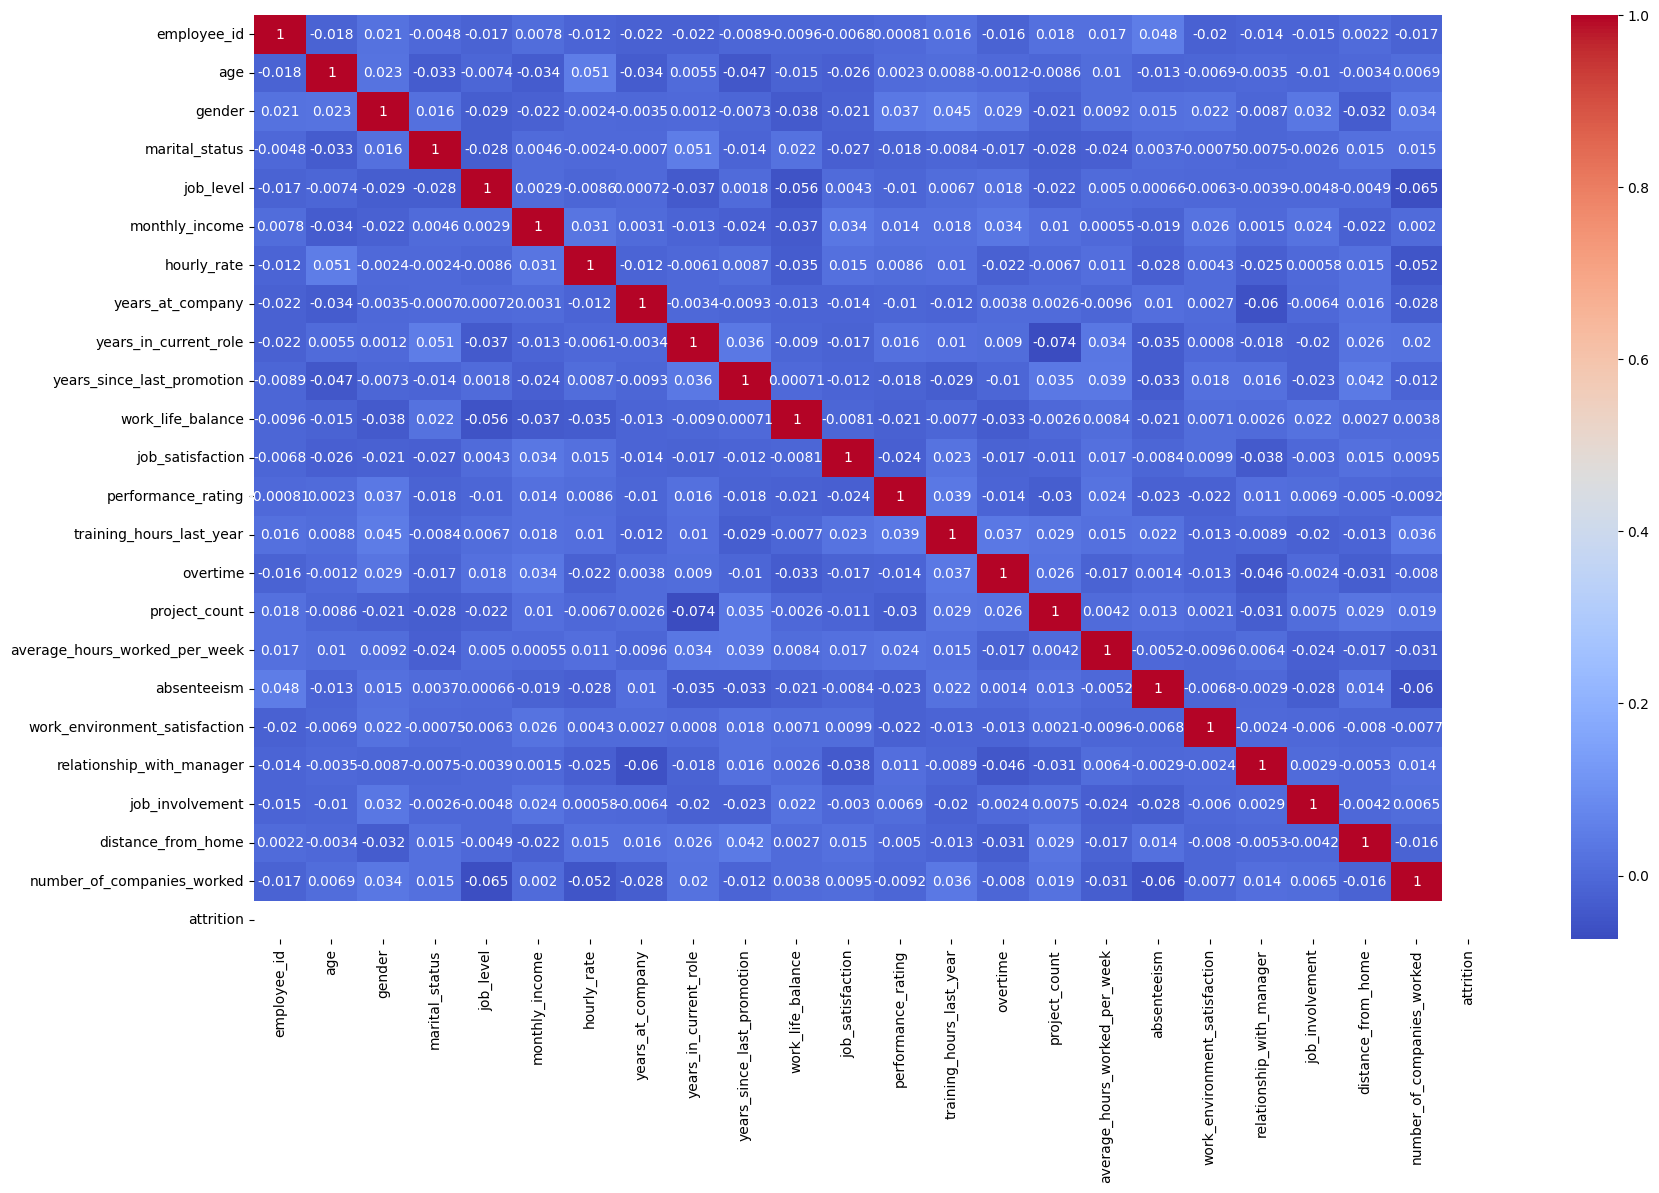

In [ ]:
attrition_yes.columns = attrition_yes.columns.str.strip()  # Remove extra spaces
attrition_yes_numeric = attrition_yes.select_dtypes(include=['number'])  # Keep only numeric columns
correlation_matrix = attrition_yes_numeric.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

**Analysis On Overall Data**

**Attrition Rate by Category**

Attrition Rate by Department

<Axes: xlabel='department'>

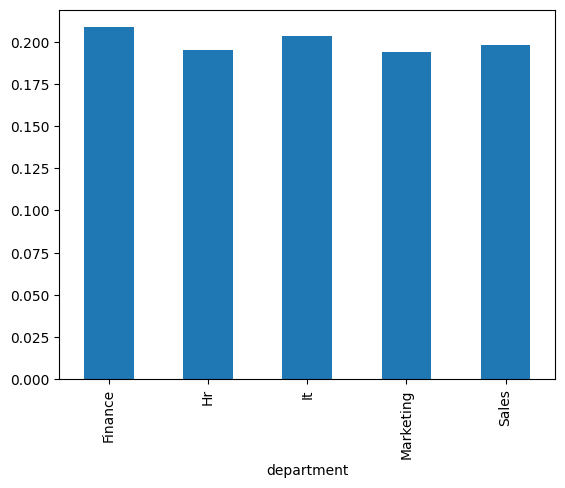

In [ ]:
attrition_rate_by_dept = df.groupby('department')['attrition'].mean()
attrition_rate_by_dept.plot(kind='bar')

Attrition Rate by Gender

<Axes: xlabel='gender', ylabel='count'>

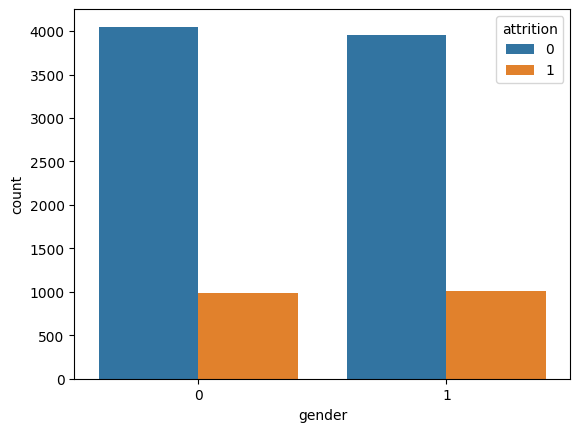

In [ ]:
sns.countplot(data=df, x='gender', hue='attrition')

Attrition by Work-Life Balance & Job Satisfaction

<Axes: xlabel='attrition', ylabel='work_life_balance'>

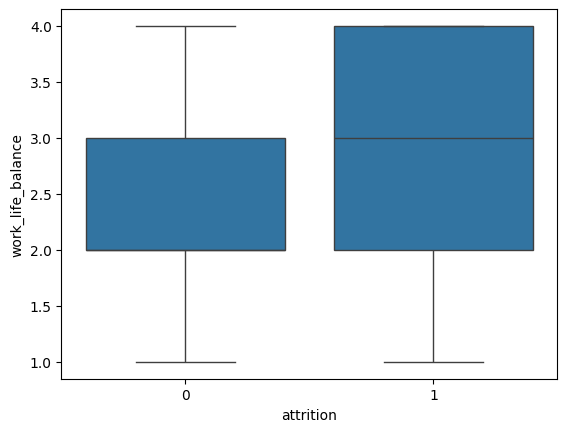

In [ ]:
sns.boxplot(data=df, x='attrition', y='work_life_balance')

 Attrition vs Monthly Income

<ipython-input-34-14739822468b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['attrition'], y=df['monthly_income'], palette="muted")


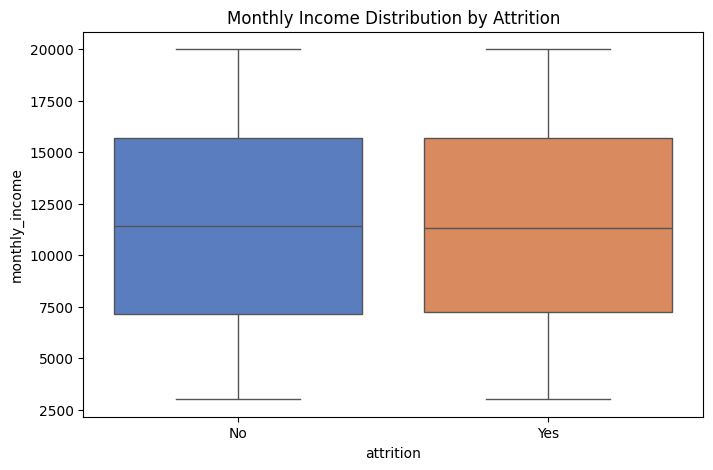

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['attrition'], y=df['monthly_income'], palette="muted")
plt.title("Monthly Income Distribution by Attrition")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


Combined Boxplot Comparison for Attrition

<ipython-input-30-39ed3ba9711a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='attrition', y='monthly_income', palette="coolwarm")
<ipython-input-30-39ed3ba9711a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='attrition', y='years_at_company', palette="coolwarm")
<ipython-input-30-39ed3ba9711a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='attrition', y='distance_from_home', palette="coolwarm")


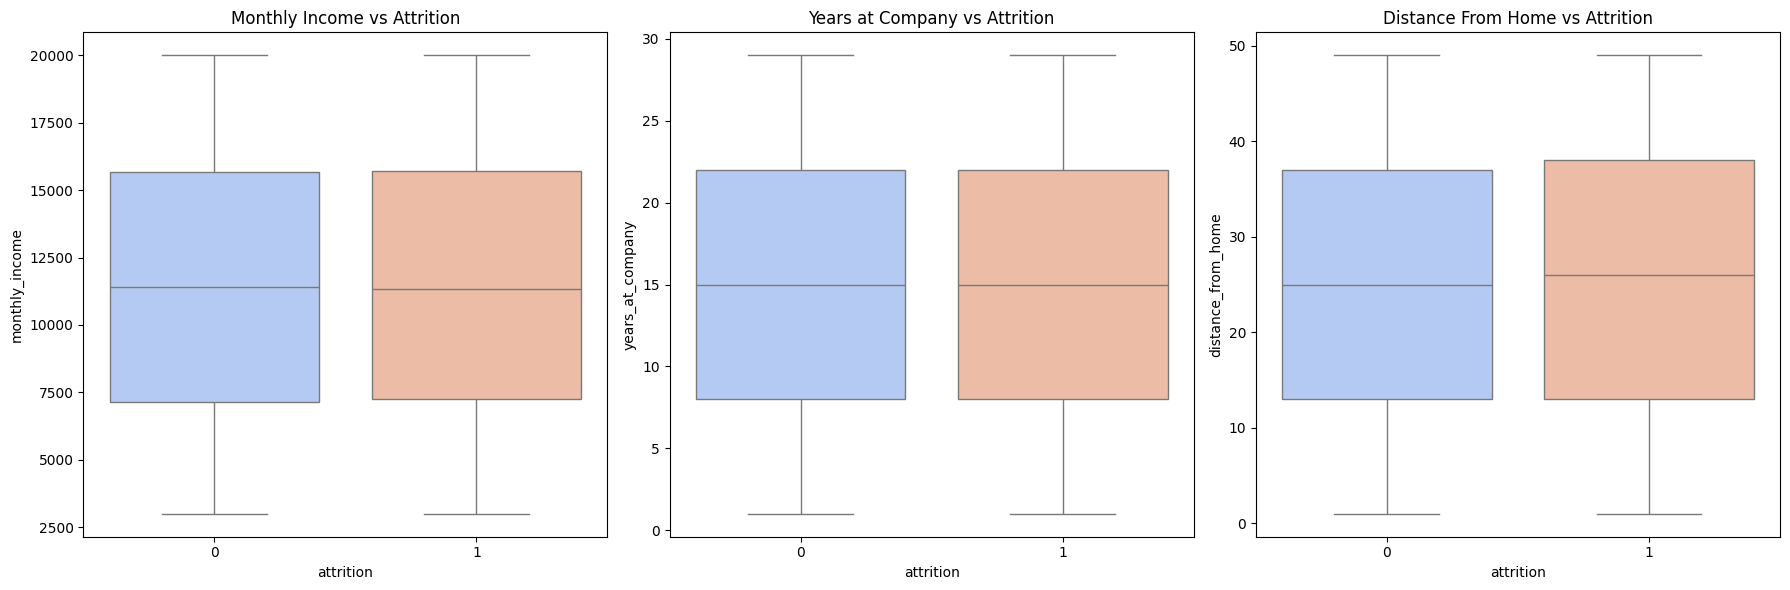

In [ ]:
# Set figure size
plt.figure(figsize=(18, 6))

# 1️⃣ Monthly Income vs Attrition
plt.subplot(1, 3, 1)  # (rows, columns, index)
sns.boxplot(data=df, x='attrition', y='monthly_income', palette="coolwarm")
plt.title("Monthly Income vs Attrition")

# 2️⃣ Years at Company vs Attrition
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='attrition', y='years_at_company', palette="coolwarm")
plt.title("Years at Company vs Attrition")

# 3️⃣ Distance From Home vs Attrition
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='attrition', y='distance_from_home', palette="coolwarm")
plt.title("Distance From Home vs Attrition")

# Display the plots
plt.tight_layout()  # Adjust spacing
plt.show()

Correlation Analysis for the Whole Dataset


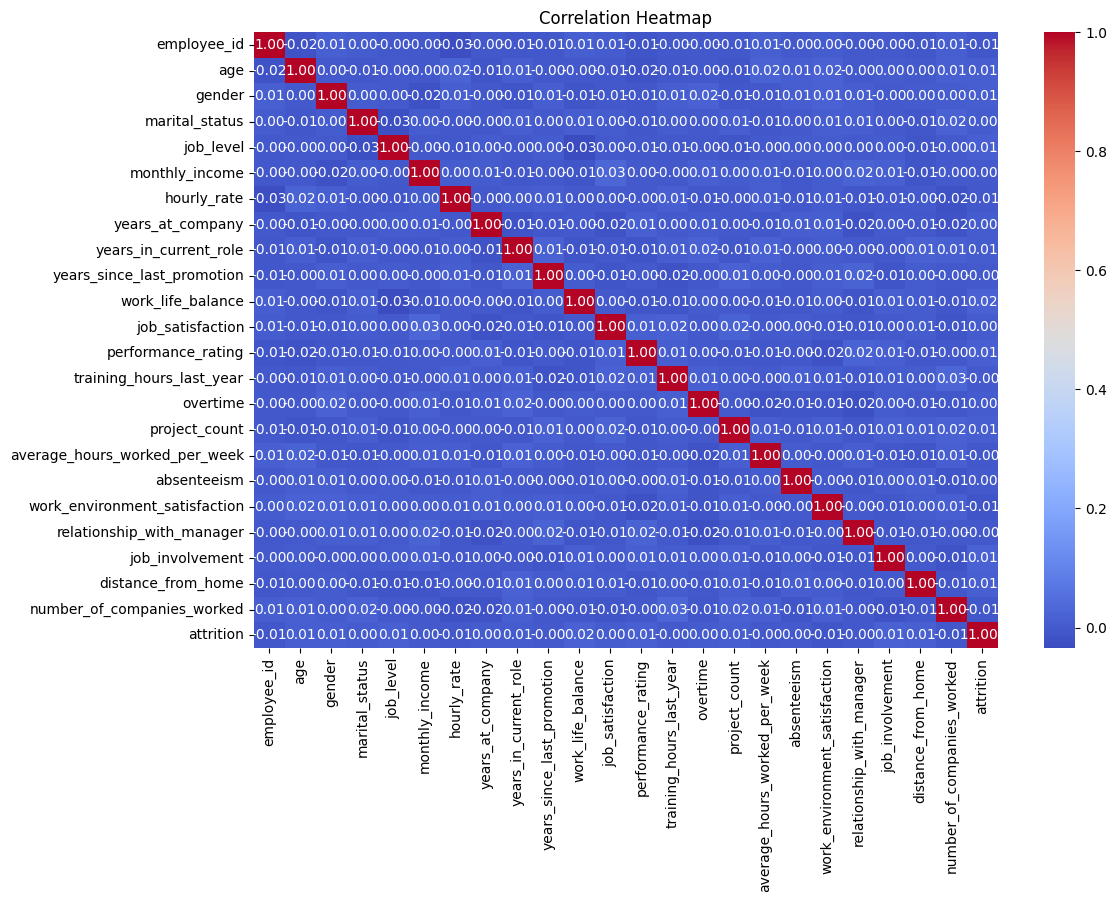

In [ ]:
df.columns = df.columns.str.strip()  # Remove extra spaces
df_numeric = df.select_dtypes(include=['number'])  # Keep only numeric columns

plt.figure(figsize=(12,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Correlation of Features with Attrition

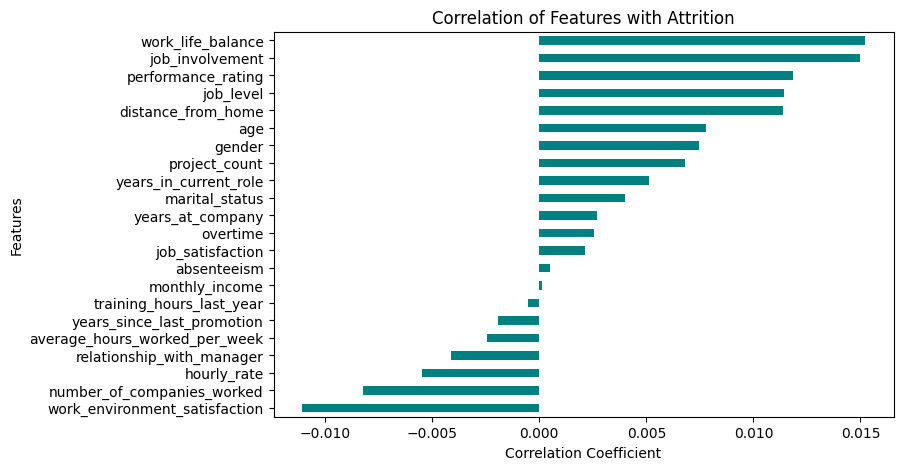

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr().drop('employee_id')

# Select the correlation values for 'attrition'
attrition_corr = correlation['attrition'].drop('attrition')  # Drop 'attrition' itself

# Plot the bar plot for attrition correlation
plt.figure(figsize=(8,5))
attrition_corr.sort_values(ascending=True).plot(kind='barh', color='teal')
plt.title("Correlation of Features with Attrition")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

**Hypothesis Testing**

Hypothesis: Does Monthly Income Affect Attrition?

Null Hypothesis (H0): Monthly income does not affect attrition.

Alternative Hypothesis (H1): Monthly income affects attrition.

In [ ]:
left_income = df[df["attrition"] == 1]["monthly_income"]
stayed_income = df[df["attrition"] == 0]["monthly_income"]

t_stat, p_value = st.ttest_ind(left_income, stayed_income)
print("T-test p-value:", p_value)

T-test p-value: 0.9892664624356821


p-value > 0.05, fail to reject H0 → No significant effect

**Final Conculsion**



In [ ]:
total_attrition = len(attrition_yes)

In [ ]:
# Calculate mid-value for Distance_From_Home
mid_distance = (attrition_yes['distance_from_home'].min() + attrition_yes['distance_from_home'].max()) / 2

# Calculate mean absenteeism
mean_absenteeism = attrition_yes['absenteeism'].mean()


In [ ]:
# Default category
attrition_yes['Attrition_Category'] = 'Other'

# 1️⃣ Job Satisfaction & Work-Life Balance ≤ 3
mask1 = (attrition_yes['job_satisfaction'] <= 3) & (attrition_yes['work_life_balance'] <= 3)
attrition_yes.loc[mask1, 'Attrition_Category'] = 'Low Job Sat & WLB'

# 2️⃣ Work Environment Satisfaction & Relationship with Manager ≤ 3
mask2 = (attrition_yes['work_environment_satisfaction'] <= 3) & (attrition_yes['relationship_with_manager'] <= 3) & ~mask1
attrition_yes.loc[mask2, 'Attrition_Category'] = 'Poor Work Env & Manager Rel'

# 3️⃣ Years at Company > 10 & Last Promotion > 4 years
mask3 = (attrition_yes['years_at_company'] > 10) & (attrition_yes['years_since_last_promotion'] > 4) & ~mask1 & ~mask2
attrition_yes.loc[mask3, 'Attrition_Category'] = 'Long Tenure & No Promotion'

# 4️⃣ Overtime & Low Pay
median_income = attrition_yes['monthly_income'].median()
mask4 = (attrition_yes['overtime'] == 1) & (attrition_yes['monthly_income'] < median_income) & ~mask1 & ~mask2 & ~mask3
attrition_yes.loc[mask4, 'Attrition_Category'] = 'Overtime & Low Pay'

# 5️⃣ Low Performance & Few Projects
mask5 = (attrition_yes['performance_rating'] <= 3) & (attrition_yes['project_count'] < 5) & ~mask1 & ~mask2 & ~mask3 & ~mask4
attrition_yes.loc[mask5, 'Attrition_Category'] = 'Low Performance & Few Projects'

# 6️⃣ High Distance from Home (greater than mid value)
mask6 = (attrition_yes['distance_from_home'] > mid_distance) & ~mask1 & ~mask2 & ~mask3 & ~mask4 & ~mask5
attrition_yes.loc[mask6, 'Attrition_Category'] = 'High Distance from Home'

# 7️⃣ High Absenteeism (greater than mean)
mask7 = (attrition_yes['absenteeism'] > mean_absenteeism) & ~mask1 & ~mask2 & ~mask3 & ~mask4 & ~mask5 & ~mask6
attrition_yes.loc[mask7, 'Attrition_Category'] = 'High Absenteeism'

# 8️⃣ Remaining Employees → Assign to "Other"
mask_other = ~mask1 & ~mask2 & ~mask3 & ~mask4 & ~mask5 & ~mask6 & ~mask7
attrition_yes.loc[mask_other, 'Attrition_Category'] = 'Other Reasons'


<ipython-input-38-23118cc95d31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_yes['Attrition_Category'] = 'Other'


In [ ]:
# Count employees in each category
category_counts = attrition_yes['Attrition_Category'].value_counts()

# Calculate percentage
category_percentages = (category_counts / len(attrition_yes)) * 100

# Display results
for category, count in category_counts.items():
    percentage = category_percentages[category]
    print(f"{category}: {count} employees ({percentage:.2f}%)")


Low Job Sat & WLB: 835 employees (41.81%)
Poor Work Env & Manager Rel: 678 employees (33.95%)
Long Tenure & No Promotion: 150 employees (7.51%)
High Distance from Home: 93 employees (4.66%)
Overtime & Low Pay: 75 employees (3.76%)
Low Performance & Few Projects: 74 employees (3.71%)
Other Reasons: 47 employees (2.35%)
High Absenteeism: 45 employees (2.25%)


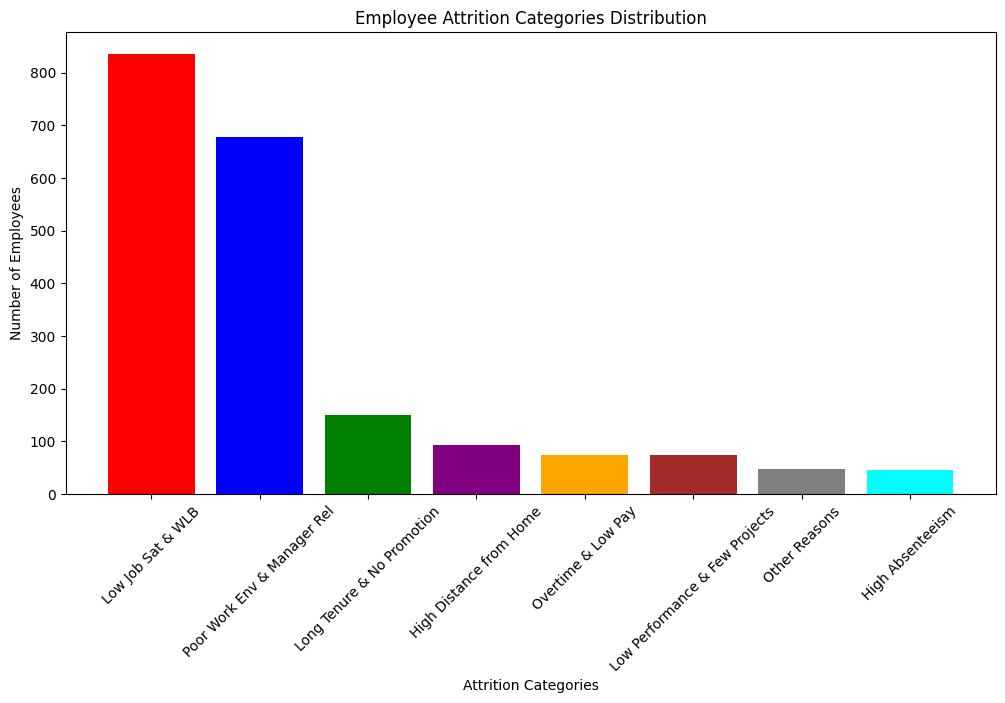

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(category_counts.index, category_counts.values, color=['red', 'blue', 'green', 'purple', 'orange', 'brown', 'gray', 'cyan'])
plt.xlabel("Attrition Categories")
plt.ylabel("Number of Employees")
plt.title("Employee Attrition Categories Distribution")
plt.xticks(rotation=45)
plt.show()


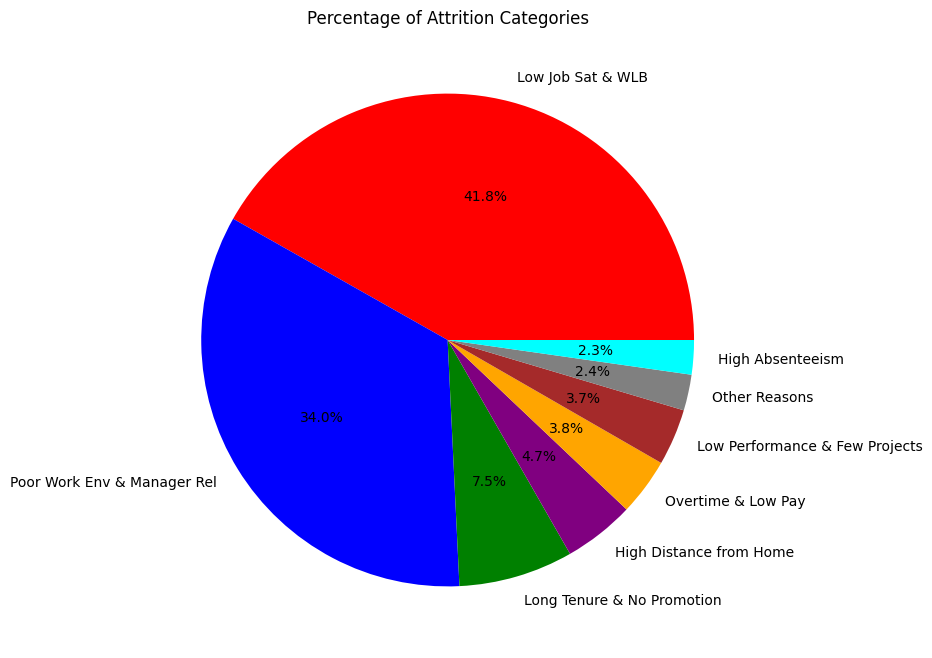

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['red', 'blue', 'green', 'purple', 'orange', 'brown', 'gray', 'cyan'])
plt.title("Percentage of Attrition Categories")
plt.show()

In [ ]:
attrition_yes.to_csv("categorized_attrition_data.csv", index=False)
